## setup

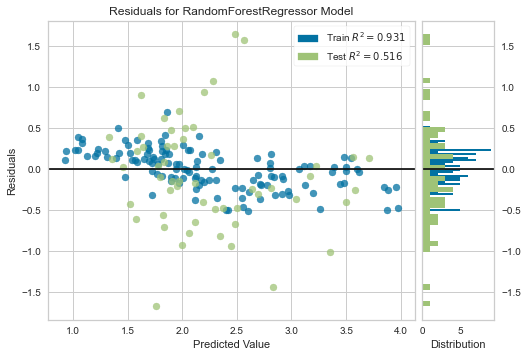

In [9]:
import pandas as pd

file = 'sampledata.csv'
df = pd.read_csv(file) 

import datetime
now = datetime.datetime.now()
NOW = now.strftime('%Y%m%d_%H%M%S')

from pycaret.regression import *
exp1 = setup(
             df, target = 'Carotenoid productivity', train_size = 0.8, 
             data_split_shuffle = True,
             fold = 10,
             session_id = 1, 
             transformation_method = "yeo-johnson", transformation = True,
             transform_target_method = "yeo-johnson", transform_target = True,
)
X_train =  get_config("X_train")
y_train = get_config("y_train")
X_test =  get_config("X_test")
y_test = get_config("y_test")
X = get_config("X")
y = get_config("y")

lg = create_model('lg')
plot_model(lg, 'residuals')

###  prediction data (datasets : feature value only) 

In [ ]:
pre_data = pd.read_csv("sampledata.csv")
model = lg

from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import mean_squared_error, r2_score
import math,csv
y_pred = predict_model(model,data = pre_data)
y_p = pd.DataFrame(y_pred)
y_p.to_csv("predict.csv")

### visualization

In [ ]:
evaluate_model(lg)

## compare all model

### compare all model & save Train Score

In [4]:
all_model = compare_models(
             exclude = ["catboost"],
             sort = 'R2',
             turbo = False, 
             n_select = 25
             )

results = pull()
results.to_csv("(train)compare_models.csv")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.5177,0.4493,0.6578,0.3389,0.2231,0.3136,0.2450
svm,Support Vector Regression,0.5494,0.4630,0.6764,0.3325,0.2313,0.3399,0.0160
et,Extra Trees Regressor,0.5272,0.4686,0.6725,0.3014,0.2263,0.3161,0.2740
ada,AdaBoost Regressor,0.5517,0.4974,0.6981,0.2729,0.2352,0.3314,0.1210
ard,Automatic Relevance Determination,0.5710,0.5043,0.7054,0.2599,0.2428,0.3479,0.0140
gbr,Gradient Boosting Regressor,0.5356,0.5253,0.7094,0.2250,0.2392,0.3107,0.0830
lightgbm,Light Gradient Boosting Machine,0.5519,0.5157,0.7058,0.2170,0.2380,0.3284,0.3400
br,Bayesian Ridge,0.5960,0.5524,0.7393,0.1852,0.2546,0.3630,0.0140
knn,K Neighbors Regressor,0.5680,0.5153,0.7049,0.1813,0.2387,0.3305,0.0340
ridge,Ridge Regression,0.5971,0.5651,0.7426,0.1561,0.2631,0.3599,0.0150


### save Test Score of "compare model" 

In [ ]:
import csv
label = ['Model','MAE','MSE','RMSE','R2','RMSLE','MAPE']
with open("(test)compare_models.csv", 'a') as f:
 writer = csv.writer(f, lineterminator='\n') 
 writer.writerow(label)

for i in all_model:
 predict_model(i)
 results = pull()
 with open("(test)compare_models.csv", 'a') as f:
   writer = csv.writer(f, lineterminator='\n')
   writer.writerow(results.iloc[0,:])

## Hyper parameter tuning

### creates each of models

In [ ]:
ada = create_model('ada')
ard = create_model('ard')
br = create_model("br")
#catboost = create_model("catboost")
dt = create_model("dt")
en = create_model("en")
et = create_model("et")
gbr = create_model("gbr")
huber = create_model("huber")
knn = create_model("knn")
kr = create_model("kr")
lar = create_model("lar")
lasso = create_model("lasso")
lightgbm = create_model("lightgbm")
llar = create_model("llar")
lr = create_model("lr")
mlp = create_model("mlp")
omp = create_model("omp")
par = create_model("par")
ransac = create_model("ransac")
rf = create_model("rf")
ridge = create_model("ridge")
svm = create_model("svm")
tr = create_model("tr")
xgboost = create_model("xgboost")

### Hyper parameter tuning (optuna) & Save models

In [ ]:
n_iter = 300
ada_tuned = tune_model(ada, n_iter = n_iter, optimize = 'RMSE', search_library = 'optuna', search_algorithm = 'tpe', choose_better = True)
save_model(ada_tuned, 'ada_tuned_model', model_only = True)
ard_tuned = tune_model(ard, n_iter = n_iter, optimize = 'RMSE', search_library = 'optuna', search_algorithm = 'tpe', choose_better = True)
save_model(ard_tuned, 'ard_tuned_model', model_only = True)
br_tuned = tune_model(br, n_iter = n_iter, optimize = 'RMSE', search_library = 'optuna', search_algorithm = 'tpe', choose_better = True)
save_model(br_tuned, 'br_tuned_model', model_only = True)
#catboost_tuned = tune_model(catboost, n_iter = n_iter, optimize = 'RMSE', search_library = 'optuna', search_algorithm = 'tpe', choose_better = True)
#save_model(catboost_tuned, 'catboost_tuned_model', model_only = True)
dt_tuned = tune_model(dt, n_iter = n_iter, optimize = 'RMSE', search_library = 'optuna', search_algorithm = 'tpe', choose_better = True)
save_model(dt_tuned, 'dt_tuned_model', model_only = True)
en_tuned = tune_model(en, n_iter = n_iter, optimize = 'RMSE', search_library = 'optuna', search_algorithm = 'tpe', choose_better = True)
save_model(en_tuned, 'en_tuned_model', model_only = True)
et_tuned = tune_model(et, n_iter = n_iter, optimize = 'RMSE', search_library = 'optuna', search_algorithm = 'tpe', choose_better = True)
save_model(et_tuned, 'et_tuned_model', model_only = True)
gbr_tuned = tune_model(gbr, n_iter = n_iter, optimize = 'RMSE', search_library = 'optuna', search_algorithm = 'tpe', choose_better = True)
save_model(gbr_tuned, 'gbr_tuned_model', model_only = True)
huber_tuned = tune_model(huber, n_iter = n_iter, optimize = 'RMSE', search_library = 'optuna', search_algorithm = 'tpe', choose_better = True)
save_model(huber_tuned, 'huber_tuned_model', model_only = True)
knn_tuned = tune_model(knn, n_iter = n_iter, optimize = 'RMSE', search_library = 'optuna', search_algorithm = 'tpe', choose_better = True)
save_model(knn_tuned, 'knn_tuned_model', model_only = True)
kr_tuned = tune_model(kr, n_iter = n_iter, optimize = 'RMSE', search_library = 'optuna', search_algorithm = 'tpe', choose_better = True)
save_model(kr_tuned, 'kr_tuned_model', model_only = True)
lar_tuned = tune_model(lar, n_iter = n_iter, optimize = 'RMSE', search_library = 'optuna', search_algorithm = 'tpe', choose_better = True)
save_model(lar_tuned, 'lar_tuned_model', model_only = True)
lasso_tuned = tune_model(lasso, n_iter = n_iter, optimize = 'RMSE', search_library = 'optuna', search_algorithm = 'tpe', choose_better = True)
save_model(lasso_tuned, 'lasso_tuned_model', model_only = True)
lightgbm_tuned = tune_model(lightgbm, n_iter = n_iter, optimize = 'RMSE', search_library = 'optuna', search_algorithm = 'tpe', choose_better = True)
save_model(lightgbm_tuned, 'lightgbm_tuned_model', model_only = True)
llar_tuned = tune_model(llar, n_iter = n_iter, optimize = 'RMSE', search_library = 'optuna', search_algorithm = 'tpe', choose_better = True)
save_model(llar_tuned, 'llar_tuned_model', model_only = True)
lr_tuned = tune_model(lr, n_iter = n_iter, optimize = 'RMSE', search_library = 'optuna', search_algorithm = 'tpe', choose_better = True)
save_model(lr_tuned, 'lr_tuned_model', model_only = True)
mlp_tuned = tune_model(mlp, n_iter = n_iter, optimize = 'RMSE', search_library = 'optuna', search_algorithm = 'tpe', choose_better = True)
save_model(mlp_tuned, 'mlp_tuned_model', model_only = True)
omp_tuned = tune_model(omp, n_iter = n_iter, optimize = 'RMSE', search_library = 'optuna', search_algorithm = 'tpe', choose_better = True)
save_model(omp_tuned, 'omp_tuned_model', model_only = True)
par_tuned = tune_model(par, n_iter = n_iter, optimize = 'RMSE', search_library = 'optuna', search_algorithm = 'tpe', choose_better = True)
save_model(par_tuned, 'par_tuned_model', model_only = True)
ransac_tuned = tune_model(ransac, n_iter = n_iter, optimize = 'RMSE', search_library = 'optuna', search_algorithm = 'tpe', choose_better = True)
save_model(ransac_tuned, 'ransac_tuned_model', model_only = True)
rf_tuned = tune_model(rf, n_iter = n_iter, optimize = 'RMSE', search_library = 'optuna', search_algorithm = 'tpe', choose_better = True)
save_model(rf_tuned, 'rf_tuned_model', model_only = True)
ridge_tuned = tune_model(ridge, n_iter = n_iter, optimize = 'RMSE', search_library = 'optuna', search_algorithm = 'tpe', choose_better = True)
save_model(ridge_tuned, 'ridge_tuned_model', model_only = True)
svm_tuned = tune_model(svm, n_iter = n_iter, optimize = 'RMSE', search_library = 'optuna', search_algorithm = 'tpe', choose_better = True)
save_model(svm_tuned, 'svm_tuned_model', model_only = True)
tr_tuned = tune_model(tr, n_iter = n_iter, optimize = 'RMSE', search_library = 'optuna', search_algorithm = 'tpe', choose_better = True)
save_model(tr_tuned, 'tr_tuned_model', model_only = True)
xgboost_tuned = tune_model(xgboost, n_iter = n_iter, optimize = 'RMSE', search_library = 'optuna', search_algorithm = 'tpe', choose_better = True)
save_model(xgboost_tuned, 'xgboost_tuned_model', model_only = True)

## load model

In [ ]:
ada_tuned = load_model('ada_tuned_model')
ard_tuned = load_model('ard_tuned_model')
br_tuned = load_model('br_tuned_model')
#catboost = load_model('catboost_tuned_model')
dt_tuned = load_model('dt_tuned_model')
en_tuned = load_model('en_tuned_model')
et_tuned = load_model('et_tuned_model')
gbr_tuned = load_model('gbr_tuned_model')
huber_tuned = load_model('huber_tuned_model')
knn_tuned = load_model('knn_tuned_model')
kr_tuned = load_model('kr_tuned_model')
lar_tuned = load_model('lar_tuned_model')
lasso_tuned = load_model('lasso_tuned_model')
lightgbm_tuned = load_model('lightgbm_tuned_model')
llar_tuned = load_model('llar_tuned_model')
lr_tuned = load_model('lr_tuned_model')
mlp_tuned = load_model('mlp_tuned_model')
omp_tuned = load_model('omp_tuned_model')
par_tuned = load_model('par_tuned_model')
ransac_tuned = load_model('ransac_tuned_model')
rf_tuned = load_model('rf_tuned_model')
ridge_tuned = load_model('ridge_tuned_model')
svm_tuned = load_model('svm_tuned_model')
tr_tuned = load_model('tr_tuned_model')
xgboost_tuned = load_model('xgboost_tuned_model')

## model evaluation

### tuned model score

In [ ]:
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import mean_squared_error, r2_score
import math,csv

DIC = {ada_tuned:"ada",ard_tuned:"ard",br_tuned:"br",dt_tuned:"dt",en_tuned:"en",et_tuned:"et",gbr_tuned:"gbr",huber_tuned:"huber",knn_tuned:"knn",kr_tuned:"kr",lar_tuned:"lar",lasso_tuned:"lasso",lightgbm_tuned:"lightgbm",llar_tuned:"llar",lr_tuned:"lr",mlp_tuned:"mlp",omp_tuned:"omp",par_tuned:"par",ransac_tuned:"ransac",rf_tuned:"rf",ridge_tuned:"ridge",svm_tuned:"svm",tr_tuned:"tr",xgboost_tuned:"xgboost"}

tuned_model = [ada_tuned,ard_tuned,br_tuned,dt_tuned,en_tuned,et_tuned,gbr_tuned,huber_tuned,knn_tuned,kr_tuned,lar_tuned,lasso_tuned,lightgbm_tuned,llar_tuned,lr_tuned,mlp_tuned,omp_tuned,par_tuned,ransac_tuned,rf_tuned,ridge_tuned,svm_tuned,tr_tuned,xgboost_tuned]

filename0 = "tune_score.csv"


hedder = ["model","(train) RMSE","(train) R2","(test) RMSE","(test) R2"]
with open(filename0, 'a') as f:
 writer = csv.writer(f, lineterminator='\n') 


for model in tuned_model:

 ado = []
 ado.append(DIC[model])

 trainA = cross_validate(model, X=X_train, y=y_train, scoring='neg_root_mean_squared_error', cv=10)  #負のRMSE
 trainB = cross_validate(model, X=X_train, y=y_train, scoring='r2', cv=10)
 train_rmse = trainA['test_score'].mean()
 train_r2 = trainB['test_score'].mean()

 y_pred = model.predict(X_test)
 test_rmse = math.sqrt(mean_squared_error(y_test, y_pred))
 test_r2 = r2_score(y_test, y_pred)

 ado.append(train_rmse)
 ado.append(train_r2)
 ado.append(test_rmse)
 ado.append(test_r2)

 with open(filename0, 'a') as f:
    writer = csv.writer(f, lineterminator='\n') 
    writer.writerow(ado)


### bagged model score

In [ ]:
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import mean_squared_error, r2_score
import math,csv

DIC = {ada_tuned:"ada",ard_tuned:"ard",br_tuned:"br",dt_tuned:"dt",en_tuned:"en",et_tuned:"et",gbr_tuned:"gbr",huber_tuned:"huber",knn_tuned:"knn",kr_tuned:"kr",lar_tuned:"lar",lasso_tuned:"lasso",lightgbm_tuned:"lightgbm",llar_tuned:"llar",lr_tuned:"lr",mlp_tuned:"mlp",omp_tuned:"omp",par_tuned:"par",ransac_tuned:"ransac",rf_tuned:"rf",ridge_tuned:"ridge",svm_tuned:"svm",tr_tuned:"tr",xgboost_tuned:"xgboost"}

tuned_model = [ada_tuned,ard_tuned,br_tuned,dt_tuned,en_tuned,et_tuned,gbr_tuned,huber_tuned,knn_tuned,kr_tuned,lar_tuned,lasso_tuned,lightgbm_tuned,llar_tuned,lr_tuned,mlp_tuned,omp_tuned,par_tuned,ransac_tuned,rf_tuned,ridge_tuned,svm_tuned,tr_tuned,xgboost_tuned]

filename0 = "bagging_score.csv"

hedder = ["model","(train) RMSE","(train) R2","(test) RMSE","(test) R2"]
with open(filename0, 'a') as f:
 writer = csv.writer(f, lineterminator='\n')
 writer.writerow(hedder)

for bag in tuned_model:
 model = ensemble_model(bag)
 ado = []
 ado.append(DIC[bag])

 trainA = cross_validate(model, X=X_train, y=y_train, scoring='neg_root_mean_squared_error', cv=10)  
 trainB = cross_validate(model, X=X_train, y=y_train, scoring='r2', cv=10)
 train_rmse = trainA['test_score'].mean()
 train_r2 = trainB['test_score'].mean()

 y_pred = model.predict(X_test)
 test_rmse = math.sqrt(mean_squared_error(y_test, y_pred))
 test_r2 = r2_score(y_test, y_pred)

 ado.append(train_rmse)
 ado.append(train_r2)
 ado.append(test_rmse)
 ado.append(test_r2)

 with open(filename0, 'a') as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerow(ado)

### boosted model score

In [ ]:
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import mean_squared_error, r2_score
import math,csv

DIC = {ada_tuned:"ada",ard_tuned:"ard",br_tuned:"br",dt_tuned:"dt",en_tuned:"en",et_tuned:"et",gbr_tuned:"gbr",huber_tuned:"huber",knn_tuned:"knn",kr_tuned:"kr",lar_tuned:"lar",lasso_tuned:"lasso",lightgbm_tuned:"lightgbm",llar_tuned:"llar",lr_tuned:"lr",mlp_tuned:"mlp",omp_tuned:"omp",par_tuned:"par",ransac_tuned:"ransac",rf_tuned:"rf",ridge_tuned:"ridge",svm_tuned:"svm",tr_tuned:"tr",xgboost_tuned:"xgboost"}

tuned_model = [ada_tuned,ard_tuned,br_tuned,dt_tuned,en_tuned,et_tuned,gbr_tuned,huber_tuned,knn_tuned,kr_tuned,lar_tuned,lasso_tuned,lightgbm_tuned,llar_tuned,lr_tuned,mlp_tuned,omp_tuned,par_tuned,ransac_tuned,rf_tuned,ridge_tuned,svm_tuned,tr_tuned,xgboost_tuned]

filename0 = "boosting_score.csv"

hedder = ["(train) RMSE","(train) R2","(test) RMSE","(test) R2"]
with open(filename0, 'a') as f:
 writer = csv.writer(f, lineterminator='\n') 
 writer.writerow(hedder)

for bag in tuned_model:
 model = ensemble_model(bag, method = 'Boosting', n_estimators = 10)
 ado = []
 ado.append(DIC[bag])

 trainA = cross_validate(model, X=X_train, y=y_train, scoring='neg_root_mean_squared_error', cv=10)  
 trainB = cross_validate(model, X=X_train, y=y_train, scoring='r2', cv=10)
 train_rmse = trainA['test_score'].mean()
 train_r2 = trainB['test_score'].mean()

 y_pred = model.predict(X_test)
 test_rmse = math.sqrt(mean_squared_error(y_test, y_pred))
 test_r2 = r2_score(y_test, y_pred)

 ado.append(train_rmse)
 ado.append(train_r2)
 ado.append(test_rmse)
 ado.append(test_r2)

 with open(filename0, 'a') as f:
    writer = csv.writer(f, lineterminator='\n') 
    writer.writerow(ado)

### vote model score

In [ ]:
import random
import csv
import math
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_validate

n_trial = 1000
filename0 = "voting_score.csv"

DIC = {ada_tuned:"ada",ard_tuned:"ard",br_tuned:"br",dt_tuned:"dt",en_tuned:"en",et_tuned:"et",gbr_tuned:"gbr",huber_tuned:"huber",knn_tuned:"knn",kr_tuned:"kr",lar_tuned:"lar",lasso_tuned:"lasso",lightgbm_tuned:"lightgbm",llar_tuned:"llar",lr_tuned:"lr",mlp_tuned:"mlp",omp_tuned:"omp",par_tuned:"par",ransac_tuned:"ransac",rf_tuned:"rf",ridge_tuned:"ridge",svm_tuned:"svm",tr_tuned:"tr",xgboost_tuned:"xgboost"}

hedder = ["(train) RMSE","(train) R2","(test) RMSE","(test) R2"]
with open(filename0, 'a') as f:
 writer = csv.writer(f, lineterminator='\n') 
 writer.writerow(hedder)

#random.sample 
#random.choices 
tuned_model = [ada_tuned,ard_tuned,br_tuned,dt_tuned,en_tuned,et_tuned,gbr_tuned,huber_tuned,knn_tuned,kr_tuned,lar_tuned,lasso_tuned,lightgbm_tuned,llar_tuned,lr_tuned,mlp_tuned,omp_tuned,par_tuned,ransac_tuned,rf_tuned,ridge_tuned,svm_tuned,tr_tuned,xgboost_tuned]

for num in range(n_trial):
    print(str(num/n_trial*100)  + "％ finished")
    numbers = random.randint(2, 24)
    modeling = random.sample(tuned_model, k=numbers)

    blender = blend_models(estimator_list = modeling, choose_better = False, optimize = 'RMSE') 
    
    trainA = cross_validate(blender, X=X_train, y=y_train, scoring='neg_root_mean_squared_error', cv=10)  
    trainB = cross_validate(blender, X=X_train, y=y_train, scoring='r2', cv=10)
    train_rmse = trainA['test_score'].mean()
    train_r2 = trainB['test_score'].mean()

    y_pred = blender.predict(X_test)
    test_rmse = math.sqrt(mean_squared_error(y_test, y_pred))
    test_r2 = r2_score(y_test, y_pred)

    lio =[]
    lio.append(train_rmse)
    lio.append(train_r2) 
    lio.append(test_rmse)
    lio.append(test_r2)    
    for model in tuned_model:
      if model in modeling:
         lio.append(DIC[model]) 
      elif model not in modeling:
         pass 
   
    with open(filename0, 'a') as f:
       writer = csv.writer(f, lineterminator='\n') 
       writer.writerow(lio)

### stack model score

In [ ]:
import random
import csv
import math
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_validate

n_trial = 1000
filename0 = "stacking_score.csv"

DIC = {ada_tuned:"ada",ard_tuned:"ard",br_tuned:"br",dt_tuned:"dt",en_tuned:"en",et_tuned:"et",gbr_tuned:"gbr",huber_tuned:"huber",knn_tuned:"knn",kr_tuned:"kr",lar_tuned:"lar",lasso_tuned:"lasso",lightgbm_tuned:"lightgbm",llar_tuned:"llar",lr_tuned:"lr",mlp_tuned:"mlp",omp_tuned:"omp",par_tuned:"par",ransac_tuned:"ransac",rf_tuned:"rf",ridge_tuned:"ridge",svm_tuned:"svm",tr_tuned:"tr",xgboost_tuned:"xgboost"}

#hedder = ["(train) RMSE","(train) R2","(test) RMSE","(test) R2","ada_tuned","ard_tuned","br_tuned","dt_tuned","en_tuned","et_tuned","gbr_tuned","huber_tuned","knn_tuned","kr_tuned","lar_tuned","lasso_tuned","lightgbm_tuned","llar_tuned","lr_tuned","mlp_tuned","omp_tuned","par_tuned","ransac_tuned","rf_tuned","ridge_tuned","svm_tuned","tr_tuned","xgboost_tuned","meta_model"]
hedder = ["(train) RMSE","(train) R2","(test) RMSE","(test) R2","meta_model"]
with open(filename0, 'a') as f:
 writer = csv.writer(f, lineterminator='\n')
 writer.writerow(hedder)

#random.sample 
#random.choices 
tuned_model = [ada_tuned,ard_tuned,br_tuned,dt_tuned,en_tuned,et_tuned,gbr_tuned,huber_tuned,knn_tuned,kr_tuned,lar_tuned,lasso_tuned,lightgbm_tuned,llar_tuned,lr_tuned,mlp_tuned,omp_tuned,par_tuned,ransac_tuned,rf_tuned,ridge_tuned,svm_tuned,tr_tuned,xgboost_tuned]

for num in range(n_trial):
    print(str(num/n_trial*100)  + "％ finished")
    numbers = random.randint(2, 24)
    modeling = random.sample(tuned_model, k=numbers)
    meta = random.choice(tuned_model)

    stacker = stack_models(estimator_list = modeling, meta_model = meta, choose_better = False, optimize = 'RMSE') 
    
    trainA = cross_validate(stacker, X=X_train, y=y_train, scoring='neg_root_mean_squared_error', cv=10)  
    trainB = cross_validate(stacker, X=X_train, y=y_train, scoring='r2', cv=10)
    train_rmse = trainA['test_score'].mean()
    train_r2 = trainB['test_score'].mean()

    y_pred = stacker.predict(X_test)
    test_rmse = math.sqrt(mean_squared_error(y_test, y_pred))
    test_r2 = r2_score(y_test, y_pred)
   
    lio =[]
    lio.append(train_rmse)
    lio.append(train_r2) 
    lio.append(test_rmse)
    lio.append(test_r2)
    lio.append(DIC[meta])    
    for model in tuned_model:
      if model in modeling:
         lio.append(DIC[model]) 
      elif model not in modeling:
         pass
   
    with open(filename0, 'a') as f:
       writer = csv.writer(f, lineterminator='\n')
       writer.writerow(lio)

## Best fit model

In [ ]:
boost=ensemble_model(kr, method = 'Boosting', n_estimators = 10)
stack1=[br, dt, en, et, huber, lasso, lightgbm, llar, lr, mlp, omp, par, ransac, tr] 
stack2=[et, lightgbm, omp, xgboost]

stacker1 = stack_models(estimator_list = stack1, meta_model = boost, choose_better = False, optimize = 'R2')
stacker2 = stack_models(estimator_list = stack2, meta_model = stacker1, choose_better = False, optimize = 'R2')

evaluate_model(stacker2)

## visualization

### SHAP（SHapley Additive exPlanations） score

In [ ]:
import shap
import matplotlib.pyplot as plt

explainer = shap.TreeExplainer(model=lg)
shap_values = explainer.shap_values(X=X)
fig = shap.summary_plot(shap_values, X, plot_type='dot', show=False)
plt.savefig("gg.png",dpi =1000)

In [11]:
model = lg
interpret_model(model,
                #use_train_data=True,
                #plot = "summary",
                #plot = "correlation",
                #plot = "reason",
                #plot = "pdp",
                #plot = "msa",
                #plot = "pfi",
                save = True
)